In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('imdb.db')
cursor = conn.cursor()

Query 1 - what are the 100 most voted titles and what are their ratings

In [ ]:
%%time

consult1 = """
           SELECT primary_title, rating, votes FROM ratings NATURAL JOIN titles ORDER BY votes DESC limit 100
           """
dfc1 = pd.read_sql_query(consult1, conn)

dfc1.to_csv('query1.csv')

dfc1

In [ ]:
%%time

consult1c = """
            SELECT primary_title, rating, votes 
            FROM ratings NATURAL JOIN titles 
            WHERE title_id IN (SELECT title_id FROM ratings ORDER BY votes DESC limit 100) ORDER BY votes DESC
           """
dfc1c = pd.read_sql_query(consult1c, conn)

dfc1c

In [ ]:
%%time

consult1b = """
           SELECT primary_title, rating, votes FROM ratings NATURAL JOIN titles ORDER BY votes limit 100
           """
dfc1b = pd.read_sql_query(consult1b, conn)

dfc1b.to_csv('query1ASC.csv')

dfc1b

In [ ]:
df = dfc1[['rating']]
dfb = dfc1b[['rating']]

plt.plot(df, label='100 mais votados')
plt.plot(dfb, color='red', label='100 menos votados')
plt.legend()
plt.show()

Query 2 - which movies have a duration of over 2,5 hours

In [38]:
%%time

consult2 = """
            SELECT primary_title, runtime_minutes FROM titles WHERE type = "movie" AND runtime_minutes > 150 ORDER BY runtime_minutes DESC
           """

dfc2 = pd.read_sql_query(consult2, conn)

dfc2.to_csv('query2.csv')

dfc2

Wall time: 859 ms


,primary_title,runtime_minutes
0,100,59460
1,Logistics,51420
2,Modern Times Forever,14400
3,Qw,10062
4,Beijing 2003,9000
5,Hunger!,6000
6,London EC1,5460
7,The Cure for Insomnia,5220
8,Ember Glow,4980
9,Deregulation,4200


Text(0, 0.5, 'duration(minutes)')

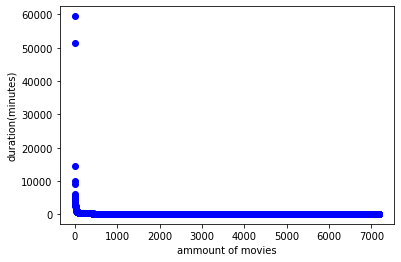

In [45]:
plt.plot(dfc2['runtime_minutes'], 'bo')
plt.xlabel('ammount of movies')
plt.ylabel('duration(minutes)')

In [ ]:
%%time

consult2b = """
SELECT primary_title, runtime_minutes FROM titles WHERE title_id IN
 (SELECT title_id FROM titles WHERE type = 'movie' AND runtime_minutes > 150)
 ORDER BY runtime_minutes DESC
        """

dfc2b = pd.read_sql_query(consult2b, conn)

dfc2b

Query 3 - Movies with a rating over 9.8

In [ ]:
%%time

consult3 = """
            SELECT primary_title, rating, votes  FROM titles NATURAL JOIN ratings WHERE rating > 9.8 AND (type= 'movie' OR type = 'tvMovie')
           """

dfc3 = pd.read_sql_query(consult3, conn)

dfc3

In [ ]:
plt.bar(dfc3['rating'], dfc3['votes'])

In [ ]:
%%time

consult3b = "SELECT primary_title, rating, votes FROM titles NATURAL JOIN ratings WHERE rating IN(SELECT rating FROM ratings WHERE rating > 9.8) AND (type= 'movie' OR type = 'tvMovie')"

dfc3b = pd.read_sql_query(consult3b, conn)

dfc3b

Query 4 - People who went on tv as themselves over 100 times

In [ ]:
%%time

consult4 = "SELECT name, born, count(name) FROM people NATURAL JOIN crew where category='self' and born <> 'NaN' and died IS NULL group by name having count(name) > 100 order by name"

dfc4 = pd.read_sql_query(consult4, conn)

dfc4

In [ ]:
%%time

consult4b = "SELECT person_id FROM people NATURAL JOIN crew WHERE category='self' AND born <> 'NaN' AND died IS NULL GROUP BY name HAVING count(name) > 100"

dfc4b = pd.read_sql_query(consult4b, conn)

dfc4b

Query 5 - Who are the 5 youngest producers in the database

In [ ]:
%%time

consult5 = """
            SELECT name, born FROM crew NATURAL JOIN people
            WHERE born <> 'NaN'and category = 'producer'
            ORDER BY born DESC limit 5
           """

dfc5 = pd.read_sql_query(consult5, conn)

dfc5.to_csv('query5.csv')

dfc5

In [ ]:
%%time

consult5b = """
            SELECT name, born
            FROM people WHERE person_id IN(SELECT person_id FROM crew NATURAL JOIN people WHERE category = 'producer') AND born <> 'NaN' ORDER BY born DESC limit 5
            """

dfc5b = pd.read_sql_query(consult5b, conn)

dfc5b

Query 6 - which series ended a year after they premiered and are available in 5 languages

In [ ]:
%%time

consult6 = """
            SELECT DISTINCT primary_title, count(*)
            FROM (episodes JOIN titles ON show_title_id = title_id) NATURAL JOIN akas
            WHERE (type='tvSeries' AND ended = premiered + 1
            AND season_number = 1 AND eposide_number = 1 AND language <> 'None') 
            GROUP BY title_id HAVING count(*) > 5
           """

dfc6 = pd.read_sql_query(consult6, conn)

dfc6.to_csv('query6.csv')

dfc6

In [ ]:
%%time

consult6b = """
            SELECT DISTINCT primary_title, count(*) 
            FROM (episodes JOIN titles ON show_title_id = title_id) 
            WHERE title_id IN
            (SELECT title_id FROM titles NATURAL JOIN akas 
            WHERE (type='tvSeries' AND ended = premiered + 1 
            AND season_number = 1 AND eposide_number = 1 AND language <> 'None')
            GROUP BY title_id HAVING count(*) > 5) 
            GROUP BY title_id HAVING count(*) > 5
            """

dfc6b = pd.read_sql_query(consult6b, conn)

dfc6b

Query 7 - Actresses over 60 who played a part in a title with over 2 hours

In [ ]:
%%time

queryactress = pd.read_sql_query(" SELECT DISTINCT name, born, primary_title, premiered, runtime_minutes FROM people NATURAL JOIN crew NATURAL JOIN titles WHERE category = 'actress' AND premiered > born + 60 AND runtime_minutes > 120 ORDER BY name", conn)

queryactress

In [ ]:
%%time

queryactors = pd.read_sql_query(" SELECT DISTINCT name, born, primary_title, premiered, runtime_minutes FROM people NATURAL JOIN crew NATURAL JOIN titles WHERE category = 'actor' AND premiered > born + 60 AND runtime_minutes > 120 ORDER BY name", conn)

queryactors

In [ ]:
plt.pie([queryactress.size, queryactors.size], labels=['Titles with actresses over 60', 'Titles with actors over 60'])

In [ ]:
%%time

queryactressb = pd.read_sql_query("SELECT DISTINCT  name, born, primary_title, premiered, runtime_minutes FROM people NATURAL JOIN crew NATURAL JOIN titles WHERE person_id IN (SELECT person_id FROM people NATURAL JOIN crew WHERE premiered > born + 60 AND category='actress') AND runtime_minutes > 120 ORDER BY name", conn)

queryactressb

Query 8 - Region BR and language PT

In [ ]:
%%time

query8 = pd.read_sql_query("select primary_title, genres, rating from akas natural join titles natural join ratings where language = 'pt' and region ='BR'", conn)

query8.to_csv('query8.csv')

query8

In [ ]:
%%time

query8b = pd.read_sql_query("select title_id, primary_title, genres, rating from titles natural join ratings where title_id IN (SELECT title_id FROM akas WHERE region='BR' and language='pt')", conn)

query8b

Consulta 9 - Quais combinações de gêneros, que possuem pelo menos 10 filmes com essa combinação, produzem as 25 maiores médias de avaliação

In [ ]:
%%time

consult9 = "SELECT genres, avg(rating) as rating_mean, count(*) as ammount_movies FROM titles NATURAL JOIN ratings WHERE type = 'movie' GROUP BY titles.genres HAVING count(*) > 10 ORDER BY rating_mean DESC limit 500"
dfc9 = pd.read_sql_query(consult9, conn)

dfc9.to_csv('query9.csv')

dfc9

In [ ]:
plt.plot(dfc9['rating_mean'], dfc9['ammount_movies'])
plt.xlabel('average rating')
plt.ylabel('ammoun of movies with genre combination')
plt.show()

In [ ]:
%%time
consult9b = "SELECT genres, avg(rating) as rating_mean FROM titles JOIN ratings WHERE titles.title_id = ratings.title_id AND type NOT IN (select type FROM titles WHERE type <> 'movie') GROUP BY titles.genres HAVING count(*) > 10 ORDER BY rating_mean DESC limit 25"
dfc9b = pd.read_sql_query(consult9, conn)

dfc9b

Query 10 - The 50 best evaluated directors who have directed at least 5 movies

In [ ]:
%%time
consult10 = """
            SELECT name, avg(rating) as average_rating
            FROM people NATURAL JOIN crew NATURAL JOIN titles NATURAL JOIN ratings
            where category = 'director' GROUP BY person_id having count(*) > 5 AND type = 'movie' ORDER BY average_rating DESC limit 50
            """

dfc10 = pd.read_sql_query(consult10, conn)

dfc10.to_csv('query10.csv')

dfc10


In [ ]:
%%time
consult10b = """
             SELECT name, avg(rating) as average_rating 
             FROM people, crew, ratings NATURAL JOIN titles
             WHERE people.person_id = crew.person_id AND crew.title_id = titles.title_id AND crew.person_id IN 
             (SELECT person_id FROM crew WHERE category = 'director') 
             GROUP BY people.person_id HAVING count(*) > 5 AND type='movie' ORDER BY average_rating DESC limit 50 
             """

dfc10b = pd.read_sql_query(consult10b, conn)

dfc10b


Query Report 1 - Genre combinations with highest season average and their average ratings

In [ ]:
consultR1 = "SELECT genres, avg(rating) as avg_rating, ROUND(count(distinct season_number) / count(distinct title_id)) as avg_seasons FROM ratings NATURAL JOIN titles JOIN episodes ON show_title_id = title_id WHERE type = 'tvSeries' GROUP BY genres HAVING avg_seasons <> 'NaN' AND avg_seasons > 0 ORDER BY avg_seasons DESC, avg_rating"
dfcr1 = pd.read_sql_query(consultR1, conn)

dfcr1

In [ ]:
plt.plot(dfcr1['avg_seasons'], dfcr1['avg_rating'])
plt.ylabel('Average rating')
plt.xlabel('Average seasons')
plt.show()

Query report 2 - Relation between crew average age and the rating

In [4]:
consultR2 = """
            SELECT primary_title, (premiered - avg(born)) as average_age, rating
            FROM ratings NATURAL JOIN titles NATURAL JOIN crew NATURAL JOIN people
            WHERE type = 'movie' AND born <> 'NaN' AND 
            (category = 'actor' OR category = 'actress' )
            GROUP BY title_id HAVING count(category) > 1 
            ORDER BY rating DESC, average_age
            """

dfcr2 = pd.read_sql_query(consultR2, conn)

dfcr2

,primary_title,average_age,rating
0,The Maltese Phallus,31.428571,10.0
1,Busty Biker Babes,23.600000,9.8
2,Nimishingal,26.000000,9.8
3,Paniwalaan mo,33.000000,9.8
4,Pas vdekjes,47.000000,9.8
5,Never-Ending Road,41.400000,9.7
6,100 Years of Chrysostom,64.333333,9.7
7,Night of Hoora,23.500000,9.6
8,Bhadar Tara Vehata Paani,41.000000,9.6
9,Dresden Diary 3,28.000000,9.5


In [8]:
consultaux = """
            SELECT name, born, premiered
            FROM crew NATURAL JOIN titles NATURAL JOIN people
            WHERE primary_title = 'Island of the Dead' AND born <> 'NaN' AND 
            (category = 'actor' OR category = 'actress' )
            """

dfaux = pd.read_sql_query(consultaux, conn)

dfaux

,name,born,premiered
0,Sergei M. Eisenstein,1898,1993
1,Joseph Stalin,1878,1993
2,Malcolm McDowell,1943,2000
3,Talisa Soto,1967,2000
4,Bruce Ramsay,1966,2000


In [ ]:
dfcr2.max()

In [5]:
dfcr2[dfcr2['average_age'] > 100]

,primary_title,average_age,rating
4473,Island of the Dead,105.0,8.0
15334,Freaks Uncensored!,148.0,7.4


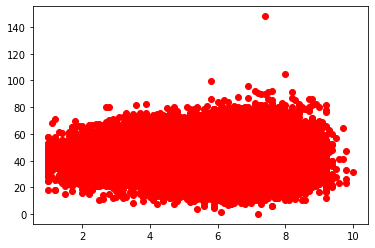

In [9]:
plt.plot(dfcr2['rating'], dfcr2['average_age'], 'ro')

Query report 3 - Relation between movies of action genre produces through time

In [12]:
consultR3 = """
            SELECT genres, premiered, count(*) as ammount_movies, avg(rating) as average_rating
            FROM titles NATURAL JOIN ratings
            WHERE type = 'movie' AND premiered <> 'NaN' AND genres LIKE '%Action%'
            GROUP BY genres, premiered ORDER BY premiered DESC
            """

dfcr3 = pd.read_sql_query(consultR3, conn)

dfcr3

,genres,premiered,ammount_movies,average_rating
0,Action,2019,74,5.877027
1,"Action,Adventure",2019,2,5.950000
2,"Action,Adventure,Animation",2019,16,7.093750
3,"Action,Adventure,Biography",2019,2,5.500000
4,"Action,Adventure,Comedy",2019,16,5.775000
5,"Action,Adventure,Crime",2019,3,6.000000
6,"Action,Adventure,Drama",2019,10,5.770000
7,"Action,Adventure,Family",2019,4,5.825000
8,"Action,Adventure,Fantasy",2019,3,5.400000
9,"Action,Adventure,History",2019,2,7.650000


In [21]:
consultR3aux = """
            SELECT genres, premiered, count(*) as ammount_movies, sum(rating) as sum_rating
            FROM titles NATURAL JOIN ratings
            WHERE type = 'movie' AND premiered <> 'NaN' AND genres LIKE '%Action%'
            GROUP BY genres, premiered ORDER BY premiered DESC
            """

dfcr3b = pd.read_sql_query(consultR3aux, conn)

dfcr3b

,genres,premiered,ammount_movies,sum_rating
0,Action,2019,74,434.9
1,"Action,Adventure",2019,2,11.9
2,"Action,Adventure,Animation",2019,16,113.5
3,"Action,Adventure,Biography",2019,2,11.0
4,"Action,Adventure,Comedy",2019,16,92.4
5,"Action,Adventure,Crime",2019,3,18.0
6,"Action,Adventure,Drama",2019,10,57.7
7,"Action,Adventure,Family",2019,4,23.3
8,"Action,Adventure,Fantasy",2019,3,16.2
9,"Action,Adventure,History",2019,2,15.3


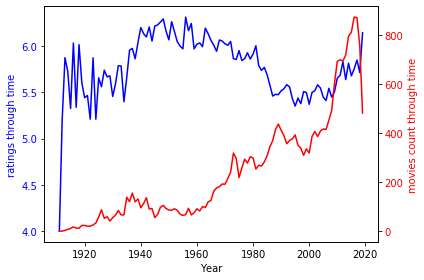

In [37]:
import numpy as np

dfcr3aux = dfcr3b.groupby('premiered').sum()
dfcr3aux['sum_rating'] = dfcr3aux['sum_rating'] / dfcr3aux['ammount_movies']

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel("ratings through time", color='blue')
ax1.plot(dfcr3aux['sum_rating'], color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel("movies count through time", color='red')
ax2.plot(dfcr3aux['ammount_movies'], color='red')
ax2.tick_params(axis='y', labelcolor='red')


fig.tight_layout()
plt.xticks([1920, 1940, 1960, 1980, 2000, 2020])
plt.show()